In [1]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import json
import time

In [2]:
# plt.style.use('seaborn')
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')
# plt.rcParams['figure.figsize'] = (8,5)

In [3]:
def rounding_vector(vector, decimal=0):
    aux = []
    for item in vector:
        aux.append(round(item,decimal))
    
    return aux

In [4]:
def read_as_json(file_name):
    with open(file_name) as json_file:
        data = json.load(json_file)
    return data

In [86]:
'''The order on vectors is corresponding with evaluated groups e.g.:[G1,G2,G3,G4,G5]'''
baseline_ild = [0.9694159990485626,0.9442230039447174,0.9593941978720311,0.9354006319845902,0.97624502398981]
baseline_p10 = [0.8,0.4,0.4,0.5,0.5]

In [87]:
'''The vector for the proposal are disposed in order: [
                                                        [[G1_stan,G1_greedy,G1_random],...,[G1_stan,G1_greedy,G1_random]],
                                                        ...
                                                        [[G5_stan,G5_greedy,G5_random],...,[G5_stan,G5_greedy,G5_random]]
                                                      ]
The number of time we ran the experiment of each group was 5.'''

prop_ild = [
    [
        [0.7953019541614298, 0.9787078861191725, 0.9415961502132234],
        [0.83595627722388, 0.9794474805350205, 0.9269096165856556],
        [0.8046898441895997, 0.9786704305770814, 0.9498343426588619],
        [0.7022654150181958, 0.9680878734647854, 0.9620026451215553],
        [0.7826719901093202, 0.9647759255163505, 0.913428396728993]
    ],
    [
        [0.8867713232142258, 0.9715281467775868, 0.9628325417950339],
        [0.8867713232142258, 0.9625387435728876, 0.9544003846259438],
        [0.9032843555872834, 0.9703775775686588, 0.9703063462249915],
        [0.8867713232142257, 0.9625387435728876, 0.9518114636326479],
        [0.9032843555872834, 0.9715281467775868, 0.9337829857250093]
    ],
    [
        [0.8920139156044071, 0.966798794846502, 0.9697985676457304],
        [0.8702020419685647, 0.970747543794492, 0.8768227023395017],
        [0.8702020419685647, 0.9619970131026159, 0.9471800896121105],
        [0.8818772896713497, 0.971108625977288, 0.9550575778521848],
        [0.8337506089491183, 0.9756616313236539, 0.9340112560558589]
    ],
    [
        [0.8505838166646339, 0.9522913415950041, 0.951958549063721],
        [0.8138669593643366, 0.9705507902994455, 0.9604825088532633],
        [0.8577610904066053, 0.9509413556439898, 0.9373745661158465],
        [0.7624477228928005, 0.9318603997344501, 0.953664423885352],
        [0.8856317578764273, 0.9683581044592141, 0.9363364809443784]
    ],
    [
        [0.9148043937915583, 0.94185076469001, 0.9562622538784413],
        [0.9178876062072044, 0.942209485189788, 0.9203903595071468],
        [0.9123873254810145, 0.9430853210971428, 0.9317932765696845],
        [0.914837868893038, 0.9533031351106007, 0.9289118635298854],
        [0.8867019303506269, 0.9450310271629726, 0.9240419189104845]
    ]
]

prop_p10 = [
    [
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.2],
        [0.4, 0.5, 0.1],
        [0.4, 0.5, 0.2],
        [0.5, 0.6, 0.3]
    ],
    [
        [0.4, 0.6, 0.3],
        [0.4, 0.6, 0.3],
        [0.4, 0.5, 0.4],
        [0.4, 0.6, 0.3],
        [0.4, 0.7, 0.4]
    ],
    [
        [0.4, 0.5, 0.3],
        [0.3, 0.5, 0.4],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.1]
    ],
    [
        [0.4, 0.4, 0.1],
        [0.4, 0.5, 0.3],
        [0.5, 0.5, 0.3],
        [0.3, 0.4, 0.3],
        [0.5, 0.5, 0.3]
    ],
    [
        [0.4, 0.4, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.5, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.6, 0.6]
    ]
]

In [88]:
def get_means_std_dict(data):
    output_dict = []
    for group in data:
        standard = []
        greedy = []
        random = []
        for run in group:
            standard.append(run[0])
            greedy.append(run[1])
            random.append(run[2])

        my_dict = dict()
        my_dict['m_standard'] = round(statistics.mean(standard),4)
        my_dict['m_greedy'] = round(statistics.mean(greedy),4)
        my_dict['m_random'] = round(statistics.mean(random),4)
        my_dict['std_standard'] = round(statistics.stdev(standard),4)
        my_dict['std_greedy'] = round(statistics.stdev(greedy),4)
        my_dict['std_random'] = round(statistics.stdev(random),4)

        output_dict.append(my_dict)
        
    return output_dict

In [89]:
prop_p10_plot = get_means_std_dict(prop_p10)

print(prop_p10_plot)

[{'m_standard': 0.46, 'm_greedy': 0.52, 'm_random': 0.24, 'std_standard': 0.0894, 'std_greedy': 0.0837, 'std_random': 0.114}, {'m_standard': 0.4, 'm_greedy': 0.6, 'm_random': 0.34, 'std_standard': 0.0, 'std_greedy': 0.0707, 'std_random': 0.0548}, {'m_standard': 0.32, 'm_greedy': 0.5, 'm_random': 0.36, 'std_standard': 0.0447, 'std_greedy': 0.0, 'std_random': 0.1673}, {'m_standard': 0.42, 'm_greedy': 0.46, 'm_random': 0.26, 'std_standard': 0.0837, 'std_greedy': 0.0548, 'std_random': 0.0894}, {'m_standard': 0.44, 'm_greedy': 0.46, 'm_random': 0.44, 'std_standard': 0.0548, 'std_greedy': 0.0894, 'std_random': 0.1342}]


In [90]:
# prop_p10_plot = []
# for group in prop_p10:
#     standard = []
#     greedy = []
#     random = []
#     for run in group:
#         standard.append(run[0])
#         greedy.append(run[1])
#         random.append(run[2])
        
#     my_dict = dict()
#     my_dict['m_standard'] = round(statistics.mean(standard),4)
#     my_dict['m_greedy'] = round(statistics.mean(greedy),4)
#     my_dict['m_random'] = round(statistics.mean(random),4)
#     my_dict['std_standard'] = round(statistics.stdev(standard),4)
#     my_dict['std_greedy'] = round(statistics.stdev(greedy),4)
#     my_dict['std_random'] = round(statistics.stdev(random),4)
    
#     prop_p10_plot.append(my_dict)
        
# print(prop_p10_plot)

In [91]:
with open('prop_p10.json', 'w') as json_file:  
    json.dump(prop_p10_plot, json_file)

In [92]:
print(prop_ild)

[[[0.7953019541614298, 0.9787078861191725, 0.9415961502132234], [0.83595627722388, 0.9794474805350205, 0.9269096165856556], [0.8046898441895997, 0.9786704305770814, 0.9498343426588619], [0.7022654150181958, 0.9680878734647854, 0.9620026451215553], [0.7826719901093202, 0.9647759255163505, 0.913428396728993]], [[0.8867713232142258, 0.9715281467775868, 0.9628325417950339], [0.8867713232142258, 0.9625387435728876, 0.9544003846259438], [0.9032843555872834, 0.9703775775686588, 0.9703063462249915], [0.8867713232142257, 0.9625387435728876, 0.9518114636326479], [0.9032843555872834, 0.9715281467775868, 0.9337829857250093]], [[0.8920139156044071, 0.966798794846502, 0.9697985676457304], [0.8702020419685647, 0.970747543794492, 0.8768227023395017], [0.8702020419685647, 0.9619970131026159, 0.9471800896121105], [0.8818772896713497, 0.971108625977288, 0.9550575778521848], [0.8337506089491183, 0.9756616313236539, 0.9340112560558589]], [[0.8505838166646339, 0.9522913415950041, 0.951958549063721], [0.8138

In [93]:
rounded = []
for group in prop_ild:
    block = []
    for run in group:
        block.append(rounding_vector(run,4))
    rounded.append(block)
    
print(rounded)

[[[0.7953, 0.9787, 0.9416], [0.836, 0.9794, 0.9269], [0.8047, 0.9787, 0.9498], [0.7023, 0.9681, 0.962], [0.7827, 0.9648, 0.9134]], [[0.8868, 0.9715, 0.9628], [0.8868, 0.9625, 0.9544], [0.9033, 0.9704, 0.9703], [0.8868, 0.9625, 0.9518], [0.9033, 0.9715, 0.9338]], [[0.892, 0.9668, 0.9698], [0.8702, 0.9707, 0.8768], [0.8702, 0.962, 0.9472], [0.8819, 0.9711, 0.9551], [0.8338, 0.9757, 0.934]], [[0.8506, 0.9523, 0.952], [0.8139, 0.9706, 0.9605], [0.8578, 0.9509, 0.9374], [0.7624, 0.9319, 0.9537], [0.8856, 0.9684, 0.9363]], [[0.9148, 0.9419, 0.9563], [0.9179, 0.9422, 0.9204], [0.9124, 0.9431, 0.9318], [0.9148, 0.9533, 0.9289], [0.8867, 0.945, 0.924]]]


In [94]:
prop_ild_plot = get_means_std_dict(rounded)

print(prop_ild_plot)

[{'m_standard': 0.7842, 'm_greedy': 0.9739, 'm_random': 0.9387, 'std_standard': 0.0498, 'std_greedy': 0.0069, 'std_random': 0.0191}, {'m_standard': 0.8934, 'm_greedy': 0.9677, 'm_random': 0.9546, 'std_standard': 0.009, 'std_greedy': 0.0047, 'std_random': 0.0137}, {'m_standard': 0.8696, 'm_greedy': 0.9693, 'm_random': 0.9366, 'std_standard': 0.022, 'std_greedy': 0.0051, 'std_random': 0.0358}, {'m_standard': 0.8341, 'm_greedy': 0.9548, 'm_random': 0.948, 'std_standard': 0.0475, 'std_greedy': 0.0157, 'std_random': 0.0107}, {'m_standard': 0.9093, 'm_greedy': 0.9451, 'm_random': 0.9323, 'std_standard': 0.0128, 'std_greedy': 0.0047, 'std_random': 0.0141}]


In [95]:
# prop_ild_plot = []
# for group in rounded:
#     standard = []
#     greedy = []
#     random = []
#     for run in group:
#         standard.append(run[0])
#         greedy.append(run[1])
#         random.append(run[2])
        
#     my_dict = dict()
#     my_dict['m_standard'] = round(statistics.mean(standard),4)
#     my_dict['m_greedy'] = round(statistics.mean(greedy),4)
#     my_dict['m_random'] = round(statistics.mean(random),4)
#     my_dict['std_standard'] = round(statistics.stdev(standard),4)
#     my_dict['std_greedy'] = round(statistics.stdev(greedy),4)
#     my_dict['std_random'] = round(statistics.stdev(random),4)
    
#     prop_ild_plot.append(my_dict)
        
# print(prop_ild_plot)

In [96]:
with open('prop_ild.json', 'w') as json_file:  
    json.dump(prop_ild_plot, json_file)

In [97]:
baseline_ild = rounding_vector(baseline_ild,4)
print(baseline_ild)

[0.9694, 0.9442, 0.9594, 0.9354, 0.9762]


Text(0.5, 1.0, 'Baseline performance on ILD metric')

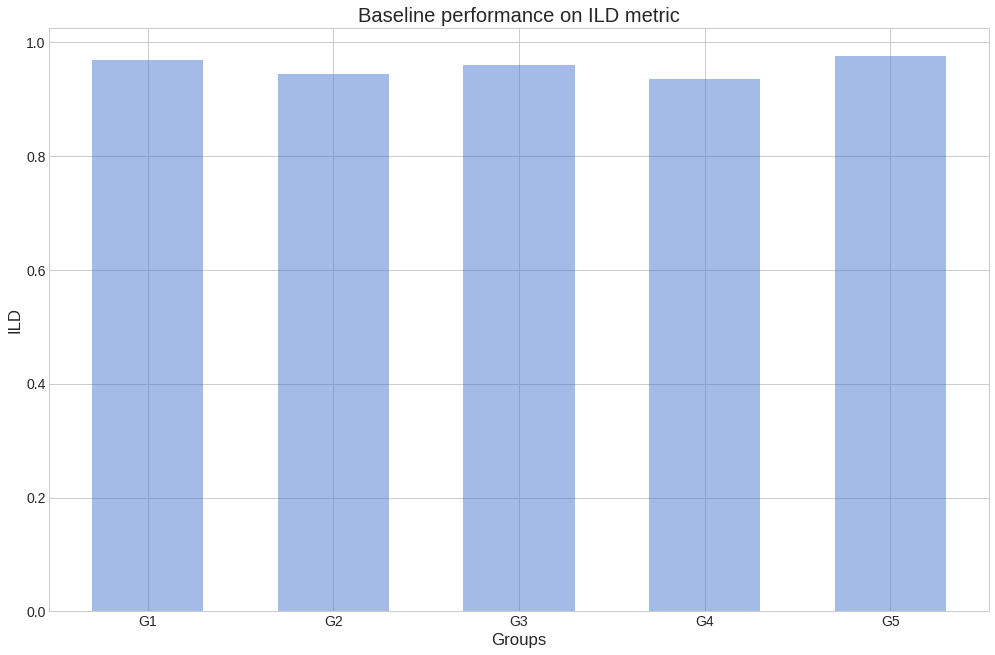

In [98]:
objects = ('G1', 'G2', 'G3', 'G4', 'G5')
y_pos = np.arange(len(objects))
values_ild = baseline_ild

plt.bar(y_pos, values_ild, width=0.6, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('ILD')
plt.xlabel('Groups')
plt.title('Baseline performance on ILD metric')

In [99]:
prop_ild = read_as_json('prop_ild.json')
prop_ild

[{'m_standard': 0.7842,
  'm_greedy': 0.9739,
  'm_random': 0.9387,
  'std_standard': 0.0498,
  'std_greedy': 0.0069,
  'std_random': 0.0191},
 {'m_standard': 0.8934,
  'm_greedy': 0.9677,
  'm_random': 0.9546,
  'std_standard': 0.009,
  'std_greedy': 0.0047,
  'std_random': 0.0137},
 {'m_standard': 0.8696,
  'm_greedy': 0.9693,
  'm_random': 0.9366,
  'std_standard': 0.022,
  'std_greedy': 0.0051,
  'std_random': 0.0358},
 {'m_standard': 0.8341,
  'm_greedy': 0.9548,
  'm_random': 0.948,
  'std_standard': 0.0475,
  'std_greedy': 0.0157,
  'std_random': 0.0107},
 {'m_standard': 0.9093,
  'm_greedy': 0.9451,
  'm_random': 0.9323,
  'std_standard': 0.0128,
  'std_greedy': 0.0047,
  'std_random': 0.0141}]

In [100]:
m_standard = []
m_greedy = []
m_random = []
std_standard = []
std_greedy = []
std_random = []
for group in prop_ild:
    m_standard.append(group['m_standard'])
    m_greedy.append(group['m_greedy'])
    m_random.append(group['m_random'])
    std_standard.append(group['std_standard'])
    std_greedy.append(group['std_greedy'])
    std_random.append(group['std_random'])
    
print(m_standard, m_greedy, m_random)

[0.7842, 0.8934, 0.8696, 0.8341, 0.9093] [0.9739, 0.9677, 0.9693, 0.9548, 0.9451] [0.9387, 0.9546, 0.9366, 0.948, 0.9323]


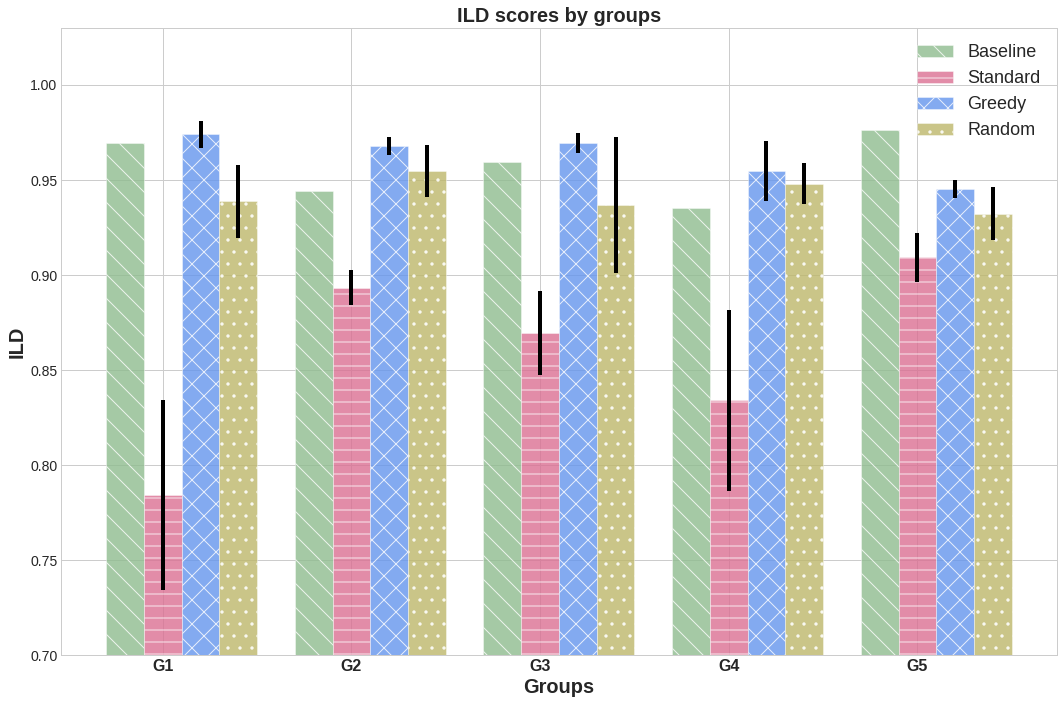

In [101]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 5
baseline_ild
m_standard
m_greedy
m_random
std_standard
std_greedy
std_random

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.8

line1 = plt.bar(index, baseline_ild, bar_width, alpha=opacity, color='darkseagreen', label='Baseline', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, m_standard, bar_width, alpha=opacity, color='palevioletred', yerr=std_standard,  label='Standard', hatch="-", edgecolor='white')
line3 = plt.bar(index + bar_width + bar_width, m_greedy, bar_width, alpha=opacity, color='cornflowerblue', yerr=std_greedy, label='Greedy', hatch="x", edgecolor='white')
line4 = plt.bar(index + bar_width + bar_width + bar_width, m_random, bar_width, alpha=opacity, color='darkkhaki', yerr=std_random, label='Random', hatch=".", edgecolor='white')


plt.xlabel('Groups', fontweight="bold", fontsize=20)
plt.ylabel('ILD', fontweight="bold", fontsize=20)
plt.title('ILD scores by groups', fontweight="bold", fontsize=20)
plt.xticks(index + bar_width, ('G1', 'G2', 'G3', 'G4', 'G5'), fontweight="bold", fontsize="16")

plt.legend(fontsize=18)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.7,None])

plt.savefig('ild_scores_by_groups_enhanced.png', transparent=True)
plt.tight_layout()
plt.show()

In [102]:
m_standard = []
m_greedy = []
m_random = []
for group in prop_p10_plot:
    m_standard.append(group['m_standard'])
    m_greedy.append(group['m_greedy'])
    m_random.append(group['m_random'])
    
print(m_standard, m_greedy, m_random)

[0.46, 0.4, 0.32, 0.42, 0.44] [0.52, 0.6, 0.5, 0.46, 0.46] [0.24, 0.34, 0.36, 0.26, 0.44]


[0.46, 0.4, 0.32, 0.42, 0.44] [0.52, 0.6, 0.5, 0.46, 0.46] [0.24, 0.34, 0.36, 0.26, 0.44]


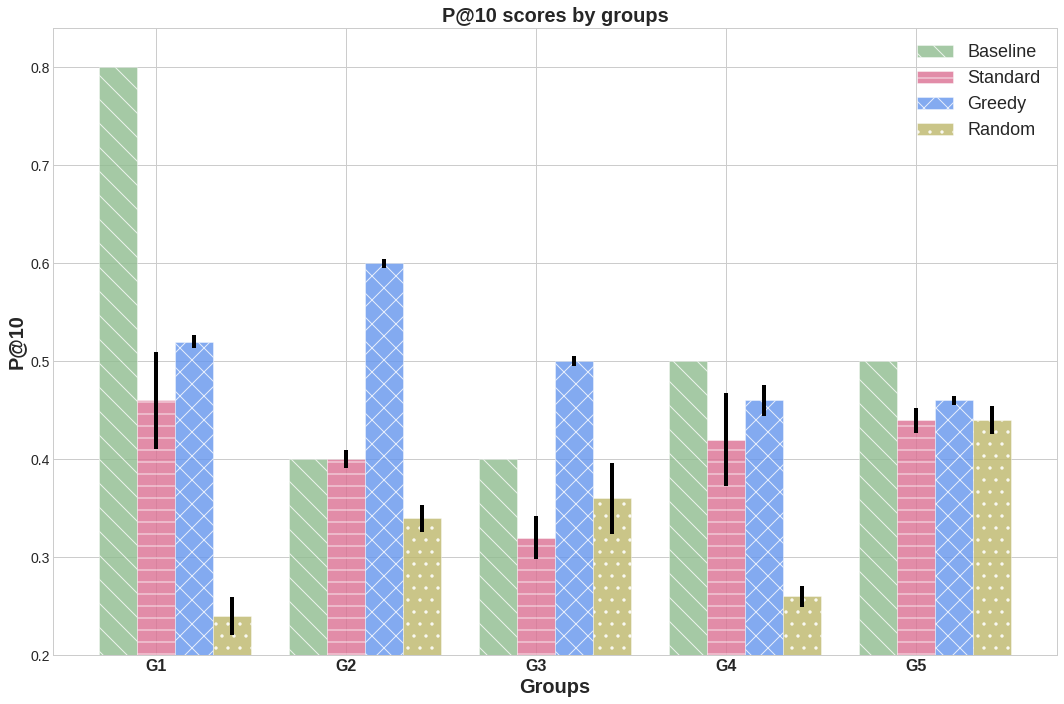

In [103]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 5
baseline_p10
m_standard
m_greedy
m_random

print(m_standard, m_greedy, m_random)

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.8

line1 = plt.bar(index, baseline_p10, bar_width, alpha=opacity, color='darkseagreen', label='Baseline', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, m_standard, bar_width, alpha=opacity, color='palevioletred', yerr=std_standard,  label='Standard', hatch="-", edgecolor='white')
line3 = plt.bar(index + bar_width + bar_width, m_greedy, bar_width, alpha=opacity, color='cornflowerblue', yerr=std_greedy, label='Greedy', hatch="x", edgecolor='white')
line4 = plt.bar(index + bar_width + bar_width + bar_width, m_random, bar_width, alpha=opacity, color='darkkhaki', yerr=std_random, label='Random', hatch=".", edgecolor='white')


plt.xlabel('Groups', fontweight="bold", fontsize=20)
plt.ylabel('P@10', fontweight="bold", fontsize=20)
plt.title('P@10 scores by groups', fontweight="bold", fontsize=20)
plt.xticks(index + bar_width, ('G1', 'G2', 'G3', 'G4', 'G5'), fontweight="bold", fontsize="16")

plt.legend(fontsize=18)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.2,None])

plt.savefig('p@10_scores_by_groups.png', transparent=True)
plt.tight_layout()
plt.show()

In [114]:
prop_p10 = [
    [
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.2],
        [0.4, 0.5, 0.1],
        [0.4, 0.5, 0.2],
        [0.5, 0.6, 0.3]
    ],
    [
        [0.4, 0.6, 0.3],
        [0.4, 0.6, 0.3],
        [0.4, 0.5, 0.4],
        [0.4, 0.6, 0.3],
        [0.4, 0.7, 0.4]
    ],
    [
        [0.4, 0.5, 0.3],
        [0.3, 0.5, 0.4],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.1]
    ],
    [
        [0.4, 0.4, 0.1],
        [0.4, 0.5, 0.3],
        [0.5, 0.5, 0.3],
        [0.3, 0.4, 0.3],
        [0.5, 0.5, 0.3]
    ],
    [
        [0.4, 0.4, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.5, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.6, 0.6]
    ]
]

prop_p5 = [
    [
        [0.4, 0.4, 0.2],
        [0.6, 0.4, 0.6],
        [0.6, 0.4, 0.2],
        [0.6, 0.4, 0.4],
        [0.6, 0.6, 0.0]
    ],
    [
        [0.6, 0.6, 0.4],
        [0.6, 0.6, 0.2],
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.5],
        [0.6, 0.6, 0.4]
    ],
    [
        [0.4, 0.4, 0.2],
        [0.6, 0.6, 0.5],
        [0.4, 0.6, 0.4],
        [0.4, 0.6, 0.4],
        [0.4, 0.4, 0.2]
    ],
    [
        [0.4, 0.6, 0.0],
        [0.6, 0.8, 0.4],
        [0.6, 0.4, 0.4],
        [0.2, 0.4, 0.2],
        [0.4, 0.4, 0.2]
    ],
    [
        [0.2, 0.4, 0.3],
        [0.2, 0.4, 0.3],
        [0.2, 0.4, 0.4],
        [0.2, 0.6, 0.4],
        [0.2, 0.6, 0.2]
    ]
]

prop_p3 = [
    [
        [0.3333, 0.3333, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.3333, 0.3333],
        [0.6666, 0.3333, 0.0],
        [0.6666, 0.3333, 0.0]
    ],
    [
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.0],
        [0.6666, 0.3333, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.3333]
    ],
    [
        [0.3333, 0.3333, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.0],
        [0.6666, 0.3333, 0.3333]
    ],
    [
        [0.6666, 0.3333, 0.0],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.0, 0.3333, 0.0],
        [0.3333, 0.6666, 0.3333]
    ],
    [
        [0.0, 0.3333, 0.0],
        [0.0, 0.0, 0.0],
        [0.3333, 0.3333, 0.0],
        [0.0, 0.6666, 0.0],
        [0.0, 0.3333, 0.3333]
    ]
]

# baseline_p10 = [0.8,0.4,0.4,0.5,0.5]
baseline_p10 = [0.8,0.4,0.4,0.5]

# baseline_p5 = [1.0, 0.6, 0.4, 0.2, 0.8]
baseline_p5 = [1.0, 0.6, 0.4, 0.2]

# baseline_p3 = [1.0, 0.6666, 0.6666, 0.0, 0.6666]
baseline_p3 = [1.0, 0.6666, 0.6666, 0.0]

In [115]:
p5 = get_means_std_dict(prop_p5)

print(p5)

[{'m_standard': 0.56, 'm_greedy': 0.44, 'm_random': 0.28, 'std_standard': 0.0894, 'std_greedy': 0.0894, 'std_random': 0.228}, {'m_standard': 0.56, 'm_greedy': 0.56, 'm_random': 0.38, 'std_standard': 0.0894, 'std_greedy': 0.0894, 'std_random': 0.1095}, {'m_standard': 0.44, 'm_greedy': 0.52, 'm_random': 0.34, 'std_standard': 0.0894, 'std_greedy': 0.1095, 'std_random': 0.1342}, {'m_standard': 0.44, 'm_greedy': 0.52, 'm_random': 0.24, 'std_standard': 0.1673, 'std_greedy': 0.1789, 'std_random': 0.1673}, {'m_standard': 0.2, 'm_greedy': 0.48, 'm_random': 0.32, 'std_standard': 0.0, 'std_greedy': 0.1095, 'std_random': 0.0837}]


In [116]:
p3 = get_means_std_dict(prop_p3)

print(p3)

[{'m_standard': 0.5999, 'm_greedy': 0.4, 'm_random': 0.2, 'std_standard': 0.1491, 'std_greedy': 0.1491, 'std_random': 0.1826}, {'m_standard': 0.6666, 'm_greedy': 0.5999, 'm_random': 0.2666, 'std_standard': 0.0, 'std_greedy': 0.1491, 'std_random': 0.1491}, {'m_standard': 0.5999, 'm_greedy': 0.5333, 'm_random': 0.2666, 'std_standard': 0.1491, 'std_greedy': 0.1826, 'std_random': 0.1491}, {'m_standard': 0.4666, 'm_greedy': 0.5333, 'm_random': 0.2, 'std_standard': 0.2981, 'std_greedy': 0.1826, 'std_random': 0.1826}, {'m_standard': 0.0667, 'm_greedy': 0.3333, 'm_random': 0.0667, 'std_standard': 0.1491, 'std_greedy': 0.2357, 'std_random': 0.1491}]


In [117]:
p10 = get_means_std_dict(prop_p10)

print(p10)

[{'m_standard': 0.46, 'm_greedy': 0.52, 'm_random': 0.24, 'std_standard': 0.0894, 'std_greedy': 0.0837, 'std_random': 0.114}, {'m_standard': 0.4, 'm_greedy': 0.6, 'm_random': 0.34, 'std_standard': 0.0, 'std_greedy': 0.0707, 'std_random': 0.0548}, {'m_standard': 0.32, 'm_greedy': 0.5, 'm_random': 0.36, 'std_standard': 0.0447, 'std_greedy': 0.0, 'std_random': 0.1673}, {'m_standard': 0.42, 'm_greedy': 0.46, 'm_random': 0.26, 'std_standard': 0.0837, 'std_greedy': 0.0548, 'std_random': 0.0894}, {'m_standard': 0.44, 'm_greedy': 0.46, 'm_random': 0.44, 'std_standard': 0.0548, 'std_greedy': 0.0894, 'std_random': 0.1342}]


In [118]:
def get_means_precision_standard_greedy_random(this_dict, n=5):
    m_standard = []
    m_greedy = []
    m_random = []
    aux_s = 0
    aux_g = 0
    aux_r = 0
    for i in range(0,n):
        aux_s += this_dict[i]['m_standard']
        aux_g += this_dict[i]['m_greedy']
        aux_r += this_dict[i]['m_random']

#     print('acc: stan:{}, gree:{}, rand:{}'.format(aux_s, aux_g, aux_r))
    m_standard = aux_s/(i+1)
    m_greedy = aux_g/(i+1)
    m_random = aux_r/(i+1)
#     print('medias: stan:{}, gree:{}, rand:{}'.format(m_p5_standard, m_p5_greedy, m_p5_random))
    return m_standard,m_greedy,m_random

In [119]:
m_p5_s, m_p5_g, m_p5_r = get_means_precision_standard_greedy_random(p5, n=4)
print(m_p5_s, m_p5_g, m_p5_r)

0.5 0.51 0.31


In [120]:
m_p3_s, m_p3_g, m_p3_r = get_means_precision_standard_greedy_random(p3,n=4)
print(m_p3_s, m_p3_g, m_p3_r)

0.58325 0.516625 0.2333


In [121]:
m_p10_s, m_p10_g, m_p10_r = get_means_precision_standard_greedy_random(p10, n=4)
print(m_p10_s, m_p10_g, m_p10_r)

0.4 0.52 0.30000000000000004


In [122]:
m_bl_p3 = statistics.mean(baseline_p3)
m_bl_p5 = statistics.mean(baseline_p5)
m_bl_p10 = statistics.mean(baseline_p10)
print(m_bl_p3, m_bl_p5, m_bl_p10)

0.5832999999999999 0.55 0.525


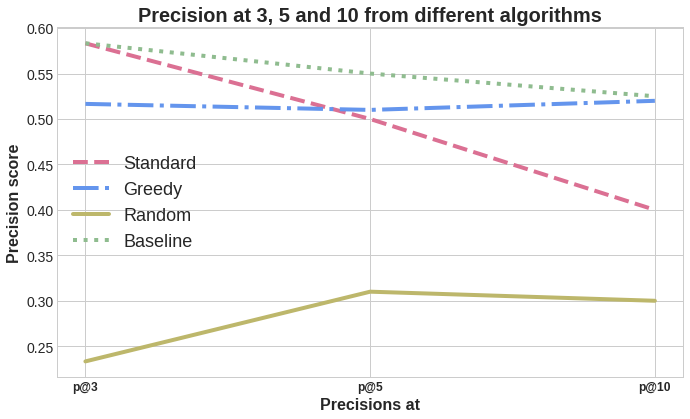

In [123]:
plt.rcParams['figure.figsize'] = (10,6)

precisions = ['p@3','p@5','p@10']
precisions_standard = [m_p3_s, m_p5_s, m_p10_s]
precisions_greedy = [m_p3_g, m_p5_g, m_p10_g]
precisions_random = [m_p3_r, m_p5_r, m_p10_r]
precisions_baseline = [m_bl_p3, m_bl_p5, m_bl_p10]

p_standard, = plt.plot(precisions, precisions_standard, color='palevioletred', linestyle='--')
p_greedy, = plt.plot(precisions, precisions_greedy, color='cornflowerblue', linestyle='-.')
p_random, = plt.plot(precisions, precisions_random, color='darkkhaki', linestyle='-')
p_baseline, = plt.plot(precisions, precisions_baseline, color='darkseagreen', linestyle=':')

plt.xlabel('Precisions at',fontweight="bold", fontsize=16)
plt.ylabel('Precision score',fontweight="bold", fontsize=16)
plt.title('Precision at 3, 5 and 10 from different algorithms',fontweight="bold", fontsize=20)
plt.xticks(precisions, ('p@3','p@5','p@10'), fontweight="bold", fontsize="12")
plt.legend([p_standard, p_greedy, p_random, p_baseline],['Standard','Greedy','Random','Baseline'], fontsize=18)

plt.savefig('p@3_5_10_algorithms_mean.png', transparent=True)
plt.show()


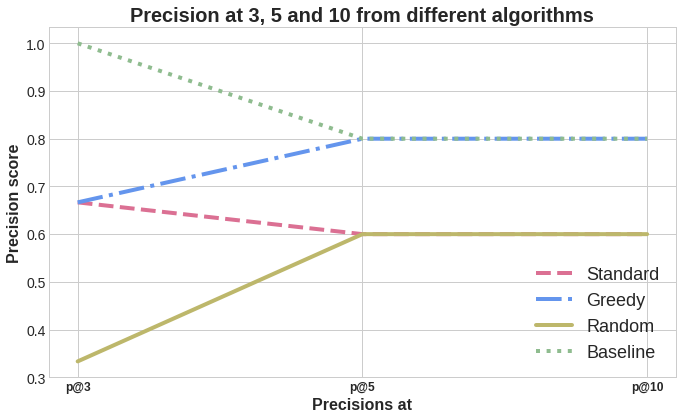

In [124]:
plt.rcParams['figure.figsize'] = (10,6)

precisions = ['p@3','p@5','p@10']
precisions_standard = [0.6666, 0.6, 0.6]
precisions_greedy = [0.6666, 0.8, 0.8]
precisions_random = [0.3333, 0.6, 0.6]
precisions_baseline = [1, 0.8, 0.8]

p_standard, = plt.plot(precisions, precisions_standard, color='palevioletred', linestyle='--')
p_greedy, = plt.plot(precisions, precisions_greedy, color='cornflowerblue', linestyle='-.')
p_random, = plt.plot(precisions, precisions_random, color='darkkhaki', linestyle='-')
p_baseline, = plt.plot(precisions, precisions_baseline, color='darkseagreen', linestyle=':')

plt.xlabel('Precisions at',fontweight="bold", fontsize=16)
plt.ylabel('Precision score',fontweight="bold", fontsize=16)
plt.title('Precision at 3, 5 and 10 from different algorithms',fontweight="bold", fontsize=20)
plt.xticks(precisions, ('p@3','p@5','p@10'), fontweight="bold", fontsize="12")
plt.legend([p_standard, p_greedy, p_random, p_baseline],['Standard','Greedy','Random','Baseline'], fontsize=18)

plt.savefig('p@3_5_10_algorithms_top.png', transparent=True)
plt.show()

In [25]:
'''---------> Graphs generated from json <-----------'''

'''-----> json file has 5 runs and each run has this format:

    {
        "recs_standard": {dict},
        "recs_greedy": {dict},
        "recs_random": {dict},
        "ild_standard": float,
        "ild_greedy": float,
        "ild_random": float,
        "p_3_5_10_standard": list,
        "p_3_5_10_greedy": list,
        "p_3_5_10_random": list
    }

'''


def calculating_mean_ild_from_json(json_obj):
    ''' Calculating mean of ILD '''
    acc_s = 0
    acc_g = 0
    acc_r = 0
    for run in json_obj:
        acc_s += run['ild_standard']
        acc_g += run['ild_greedy']
        acc_r += run['ild_random']

    mean_s = acc_s / len(json_obj)
    mean_g = acc_g / len(json_obj)
    mean_r = acc_r / len(json_obj)
    
    return mean_s, mean_g, mean_r
    


def calculating_mean_p_3_5_10_from_json(json_obj):
    p_3_5_10_s = []
    p_3_5_10_g = []
    p_3_5_10_r = []

    for i in range(0,3):
        acc_s = 0
        acc_g = 0
        acc_r = 0

        for run in json_obj:
            acc_s += run['p_3_5_10_standard'][i]
            acc_g += run['p_3_5_10_greedy'][i]
            acc_r += run['p_3_5_10_random'][i]

        mean_s = acc_s / len(json_obj)
        mean_g = acc_g / len(json_obj)
        mean_r = acc_r / len(json_obj)

        p_3_5_10_s.append(mean_s)
        p_3_5_10_g.append(mean_g)
        p_3_5_10_r.append(mean_r)
    
    return p_3_5_10_s, p_3_5_10_g, p_3_5_10_r 

In [28]:
mp_g1_run = []

with open('MP_G1_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g1_run.append(data)
        

mean_s_g1, mean_g_g1, mean_r_g1 = calculating_mean_ild_from_json(mp_g1_run)
print('mean_s={}, mean_g={}, mean_r={}'.format(mean_s_g1, mean_g_g1, mean_r_g1))


p_3_5_10_s_g1, p_3_5_10_g_g1, p_3_5_10_r_g1 = calculating_mean_p_3_5_10_from_json(mp_g1_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_s_g1, p_3_5_10_g_g1, p_3_5_10_r_g1))

mean_s=0.8576537939455824, mean_g=0.9463255142978347, mean_r=0.9425207601444685
p_3_5_10_s=[0.6666666666666666, 0.6, 0.6], p_3_5_10_g=[1.0, 0.8, 0.6], p_3_5_10_r=[0.3333333333333333, 0.32, 0.32]


In [31]:
mp_g2_run = []

with open('MP_G2_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g2_run.append(data)
        

mean_s_g2, mean_g_g2, mean_r_g2 = calculating_mean_ild_from_json(mp_g2_run)
print('mean_s={}, mean_g={}, mean_r={}'.format(mean_s_g2, mean_g_g2, mean_r_g2))


p_3_5_10_s_g2, p_3_5_10_g_g2, p_3_5_10_r_g2 = calculating_mean_p_3_5_10_from_json(mp_g2_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_s_g2, p_3_5_10_g_g2, p_3_5_10_r_g2))

mean_s=0.8199527486527357, mean_g=0.9560501757097898, mean_r=0.9440433623631688
p_3_5_10_s=[0.6666666666666666, 0.4, 0.4], p_3_5_10_g=[1.0, 0.8, 0.4], p_3_5_10_r=[0.39999999999999997, 0.4800000000000001, 0.43999999999999995]


In [32]:
mp_g3_run = []

with open('MP_G3_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g3_run.append(data)
        

mean_s_g3, mean_g_g3, mean_r_g3 = calculating_mean_ild_from_json(mp_g3_run)
print('mean_s={}, mean_g={}, mean_r={}'.format(mean_s_g3, mean_g_g3, mean_r_g3))


p_3_5_10_s_g3, p_3_5_10_g_g3, p_3_5_10_r_g3 = calculating_mean_p_3_5_10_from_json(mp_g3_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_s_g3, p_3_5_10_g_g3, p_3_5_10_r_g3))

mean_s=0.7922859806520856, mean_g=0.9683537431434039, mean_r=0.9509041186660363
p_3_5_10_s=[0.6666666666666666, 0.8, 0.7], p_3_5_10_g=[1.0, 0.6, 0.5], p_3_5_10_r=[0.5333333333333333, 0.5599999999999999, 0.48]


In [33]:
mp_g4_run = []

with open('MP_G4_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g4_run.append(data)
        

mean_s_g4, mean_g_g4, mean_r_g4 = calculating_mean_ild_from_json(mp_g4_run)
print('mean_s={}, mean_g={}, mean_r={}'.format(mean_s_g4, mean_g_g4, mean_r_g4))


p_3_5_10_s_g4, p_3_5_10_g_g4, p_3_5_10_r_g4 = calculating_mean_p_3_5_10_from_json(mp_g4_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_s_g4, p_3_5_10_g_g4, p_3_5_10_r_g4))

mean_s=0.7755138674400073, mean_g=0.9297269596077775, mean_r=0.9316355101091818
p_3_5_10_s=[0.06666666666666667, 0.04, 0.12], p_3_5_10_g=[0.06666666666666667, 0.04, 0.1], p_3_5_10_r=[0.26666666666666666, 0.24, 0.30000000000000004]


In [34]:
mp_g5_run = []

with open('MP_G5_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g5_run.append(data)
        

mean_s_g5, mean_g_g5, mean_r_g5 = calculating_mean_ild_from_json(mp_g5_run)
print('mean_s={}, mean_g={}, mean_r={}'.format(mean_s_g5, mean_g_g5, mean_r_g5))


p_3_5_10_s_g5, p_3_5_10_g_g5, p_3_5_10_r_g5 = calculating_mean_p_3_5_10_from_json(mp_g5_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_s_g5, p_3_5_10_g_g5, p_3_5_10_r_g5))

mean_s=0.7935179124826943, mean_g=0.9546999705365234, mean_r=0.9484702031999779
p_3_5_10_s=[0.6666666666666666, 0.6, 0.4], p_3_5_10_g=[0.3333333333333333, 0.2, 0.4], p_3_5_10_r=[0.13333333333333333, 0.24, 0.24]
